In [1]:
import matplotlib.pyplot as plt

import pypsa

plt.rc("figure", figsize=(8, 8))

In [2]:
# Se parte de un ejemplo de una red dada por la librería en la que se consideran 
# tres nodos AC y otros 3 DC conectados a través de un adaptador AC-DC
network = pypsa.examples.ac_dc_meshed(from_master=True)

C:\Users\111239\AppData\Local\Temp\ipykernel_25560\992264737.py:1: DeprecationWarning:

The 'update' 'from_master' and 'remove_link_p_set' parameters are deprecated and do not have any effect. Example networks are always updated and retrieved for the current version.Deprecated in version 0.35 and will be removed in version 1.0.

INFO:pypsa.network.io:Retrieving network data from https://github.com/PyPSA/PyPSA/raw/v0.35.1/examples/networks/ac-dc-meshed/ac-dc-meshed.nc.
INFO:pypsa.network.io:Imported network 'AC-DC-Meshed' has buses, carriers, generators, global_constraints, lines, links, loads


In [3]:
# Se muestra el tipo (AC o DC) de las líneas que se tienen
lines_current_type = network.lines.bus0.map(network.buses.carrier)
lines_current_type

Line
0    AC
1    AC
2    DC
3    DC
4    DC
5    AC
6    AC
Name: bus0, dtype: object

c:\Users\111239\OneDrive - Fundacion Tecnalia Research & Innovation\Escritorio\Pypsa\pypsa_tests\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_land.zip

c:\Users\111239\OneDrive - Fundacion Tecnalia Research & Innovation\Escritorio\Pypsa\pypsa_tests\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_ocean.zip

c:\Users\111239\OneDrive - Fundacion Tecnalia Research & Innovation\Escritorio\Pypsa\pypsa_tests\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip

c:\Users\111239\OneDrive - Fundacion Tecnalia Research & Innovation\Escritorio\Pypsa\pypsa_tests\Lib\site-packages\cartopy\io\__init__.py:241: DownloadWarning:

Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip



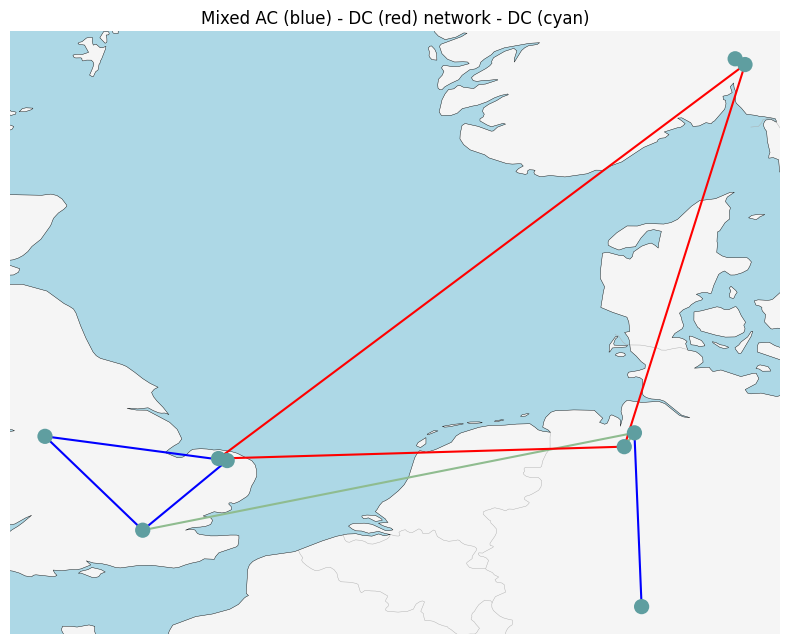

In [4]:
# Se pueden situar los buses en un mapa y mostrar el tipo de las líneas que los
# unen
network.plot.map(
    line_colors=lines_current_type.map(lambda ct: "r" if ct == "DC" else "b"),
    title="Mixed AC (blue) - DC (red) network - DC (cyan)",
    color_geomap=True,
    jitter=0.3,
)
plt.tight_layout()

In [5]:
network.links.loc["Norwich Converter", "p_nom_extendable"] = False

In [6]:
# Se inspecciona la topología de las distintas subredes que componen la red principal
# mostrando su tipo, número de ramas y nodos
network.determine_network_topology()
network.sub_networks["n_branches"] = [
    len(sn.branches()) for sn in network.sub_networks.obj
]
network.sub_networks["n_buses"] = [len(sn.buses()) for sn in network.sub_networks.obj]

network.sub_networks

,carrier,slack_bus,obj,n_branches,n_buses
SubNetwork,,,,,
0,AC,Manchester,<pypsa.networks.SubNetwork object at 0x0000019...,3,3
1,DC,Norwich DC,<pypsa.networks.SubNetwork object at 0x0000019...,3,3
2,AC,Frankfurt,<pypsa.networks.SubNetwork object at 0x0000019...,1,2
3,AC,Norway,<pypsa.networks.SubNetwork object at 0x0000019...,0,1


In [7]:
# Se consideran para esta red los 10 timesteps mostrados debajo
network.snapshots

DatetimeIndex(['2015-01-01 00:00:00', '2015-01-01 01:00:00',
               '2015-01-01 02:00:00', '2015-01-01 03:00:00',
               '2015-01-01 04:00:00', '2015-01-01 05:00:00',
               '2015-01-01 06:00:00', '2015-01-01 07:00:00',
               '2015-01-01 08:00:00', '2015-01-01 09:00:00'],
              dtype='datetime64[ns]', name='snapshot', freq=None)

In [8]:
# En la red se tienen los 6 generadores que se muestran a continuación
network.generators

,bus,control,type,p_nom,p_nom_mod,p_nom_extendable,p_nom_min,p_nom_max,p_min_pu,p_max_pu,...,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,weight,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
Manchester Wind,Manchester,Slack,,80.0,0.0,True,100.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Manchester Gas,Manchester,PQ,,50000.0,0.0,True,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Norway Wind,Norway,Slack,,100.0,0.0,True,100.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Norway Gas,Norway,PQ,,20000.0,0.0,True,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Frankfurt Wind,Frankfurt,Slack,,110.0,0.0,True,100.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0
Frankfurt Gas,Frankfurt,PQ,,80000.0,0.0,True,0.0,inf,0.0,1.0,...,0,0,1,0,NaN,NaN,1.0,1.0,1.0,0.0


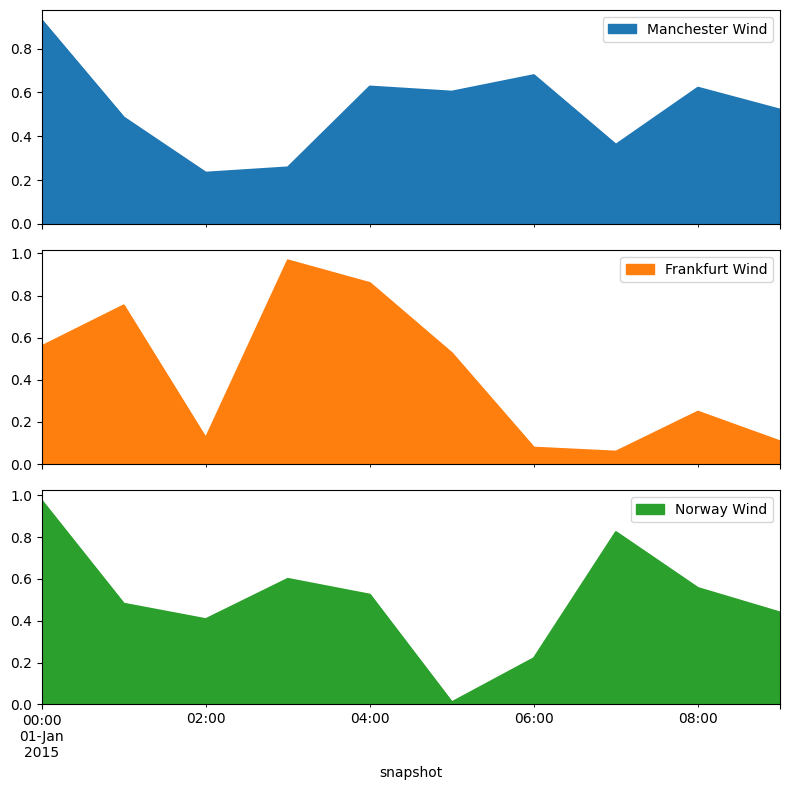

In [9]:
# Se puede mostrar la potencia por unidad que dará cada generador en base a las
# predicciones meteorológicas en los diversos lugares en cada step considerado

# Esto servirá para saber cómo organizar la red en función de cuanto se genere 
# en cada lugar
network.generators_t.p_max_pu.plot.area(subplots=True)
plt.tight_layout()

In [10]:
# En base a lo mostrado, ahora se pretende dar con la forma óptima de generar energía
# y gestionar la infraestructura que se tiene para cubrir la demanda
network.optimize()

Index(['2', '3', '4'], dtype='object', name='Line')
Index(['0', '1', '5', '6'], dtype='object', name='Line')
INFO:linopy.model: Solve problem using Highs solver
INFO:linopy.io: Writing time: 0.1s
INFO:linopy.constants: Optimization successful: 
Status: ok
Termination condition: optimal
Solution: 187 primals, 467 duals
Objective: -3.47e+06
Solver model: available
Solver message: Optimal

INFO:pypsa.optimization.optimize:The shadow-prices of the constraints Generator-ext-p-lower, Generator-ext-p-upper, Line-ext-s-lower, Line-ext-s-upper, Link-fix-p-lower, Link-fix-p-upper, Link-ext-p-lower, Link-ext-p-upper, Kirchhoff-Voltage-Law were not assigned to the network.


('ok', 'optimal')

In [11]:
# Mostramos reducción de coste entre network al inicio y la solución del solver
# a lo largo de los steps considerados
network.objective

-3474094.1308449395

In [13]:
# Para el coste total simplemente se tiene en cuenta el coste que se tendría
# con el estado inicial de la red
network.objective + network.objective_constant

np.float64(18440973.387434203)

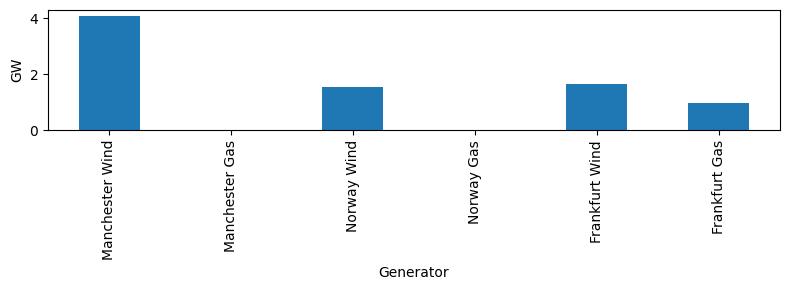

In [14]:
# Las capacidades óptimas de los generadores
network.generators.p_nom_opt.div(1e3).plot.bar(ylabel="GW", figsize=(8, 3))
plt.tight_layout()

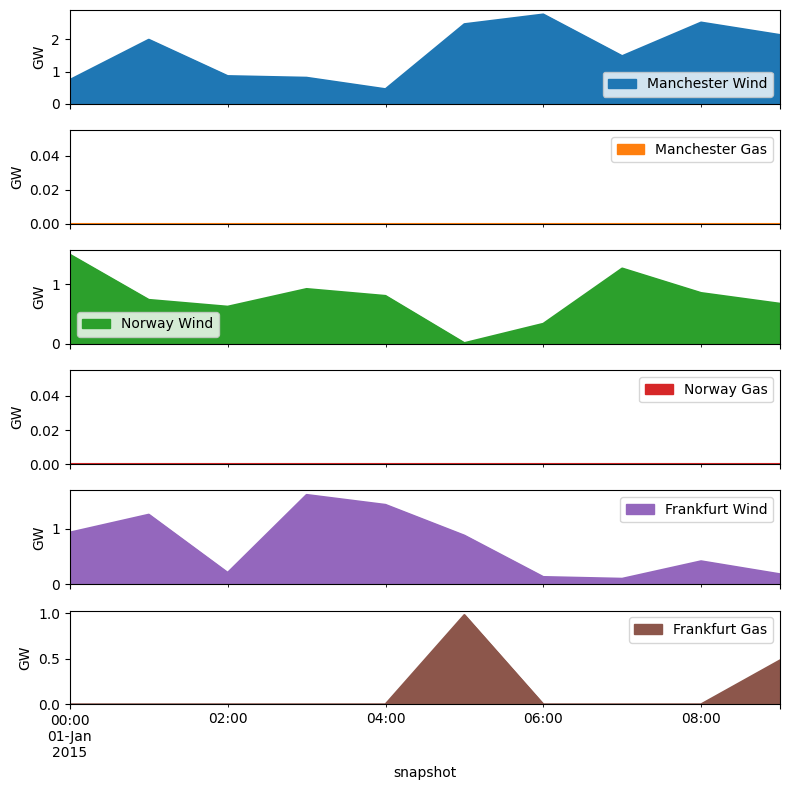

In [15]:
# Producción de los generadores
network.generators_t.p.div(1e3).plot.area(subplots=True, ylabel="GW")
plt.tight_layout()

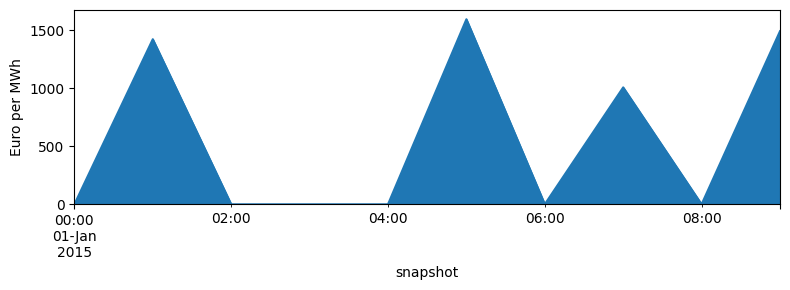

In [16]:
# Se muestra el coste marginal de la red por MWh en cada timestep
network.buses_t.marginal_price.mean(1).plot.area(figsize=(8, 3), ylabel="Euro per MWh")
plt.tight_layout()

In [17]:
# Potencia activa de los convertidores
network.links_t.p0

Link,Norwich Converter,Norway Converter,Bremen Converter,DC link
snapshot,,,,
2015-01-01 00:00:00,-250.841318,674.584826,-423.743508,-317.997991
2015-01-01 01:00:00,315.068611,-116.727192,-198.341419,-317.997991
2015-01-01 02:00:00,350.761618,581.970687,-932.732306,-317.997991
2015-01-01 03:00:00,-85.772148,272.557949,-186.785801,-317.997991
2015-01-01 04:00:00,317.366721,-79.749487,-237.617234,-317.997991
2015-01-01 05:00:00,386.747627,-494.197717,107.450090,-317.997991
2015-01-01 06:00:00,900.000000,-257.520720,-642.479280,317.997991
2015-01-01 07:00:00,123.677319,971.918845,-1095.596165,-86.858742
2015-01-01 08:00:00,244.715828,850.880337,-1095.596165,317.997991


In [18]:
# También para las líneas
network.lines_t.p0

Line,0,1,2,3,4,5,6
snapshot,,,,,,,
2015-01-01 00:00:00,79.474931,-38.105568,-52.967153,-303.808471,370.776355,-202.726815,-534.340860
2015-01-01 01:00:00,-449.464018,787.037310,-211.273022,103.795589,-12.931603,209.362553,-823.210906
2015-01-01 02:00:00,-181.265945,520.561348,-505.913540,-155.151921,426.818766,-248.676623,173.898185
2015-01-01 03:00:00,-45.472529,234.470017,-34.040733,-119.812880,152.745069,-232.717375,-743.788495
2015-01-01 04:00:00,-73.207796,295.420961,-227.198461,90.168260,10.418773,-240.105618,-883.817538
2015-01-01 05:00:00,-594.500052,1198.082901,-125.903894,260.843733,-233.353984,19.359009,-1030.848768
2015-01-01 06:00:00,-661.294714,1378.422245,-632.371427,267.628573,10.107853,-53.448436,319.386680
2015-01-01 07:00:00,-383.768641,540.906725,-469.925715,-346.248396,625.670450,393.715939,600.728881
2015-01-01 08:00:00,-778.280943,1444.069207,-522.116240,-277.400413,573.479924,229.294311,501.346379


In [19]:
# Y para cada bus
network.buses_t.p

Bus,London,Norwich,Norwich DC,Manchester,Bremen,Bremen DC,Frankfurt,Norway,Norway DC
snapshot,,,,,,,,,
2015-01-01 00:00:00,282.201747,-164.621247,-250.841318,-117.580500,-534.340860,-423.743508,534.340860,0.000000e+00,674.584826
2015-01-01 01:00:00,-658.826571,-577.674757,315.068611,1236.501328,-823.210906,-198.341419,823.210906,2.000888e-10,-116.727192
2015-01-01 02:00:00,67.410679,-769.237972,350.761618,701.827293,173.898185,-932.732306,-173.898185,0.000000e+00,581.970687
2015-01-01 03:00:00,187.244846,-467.187392,-85.772148,279.942546,-743.788495,-186.785801,743.788495,-1.000444e-10,272.557949
2015-01-01 04:00:00,166.897822,-535.526579,317.366721,368.628757,-883.817538,-237.617234,883.817538,3.999503e-10,-79.749487
2015-01-01 05:00:00,-613.859061,-1178.723892,386.747627,1792.582954,-1030.848768,107.450090,1030.848768,3.999503e-10,-494.197717
2015-01-01 06:00:00,-607.846278,-1431.870681,900.000000,2039.716959,319.386680,-642.479280,-319.386680,2.999059e-10,-257.520720
2015-01-01 07:00:00,-777.484580,-147.190786,123.677319,924.675366,600.728881,-1095.596165,-600.728881,-3.999503e-10,971.918845
2015-01-01 08:00:00,-1007.575254,-1214.774896,244.715828,2222.350150,501.346379,-1095.596165,-501.346379,0.000000e+00,850.880337
